# Lecture 6: Linear Algebra and Linear Regression

## 10/25/2022

### Table of Contents
* [Linear Algebra](#linear_algebra)  
    * [Motivation](#motivation)  
    * [Notation](#notation)  
    * [Matrix Terminology](#terminology) 
    * [Matrix Operations](#operation) 
        * [Transpose](#transpose)
        * [Addition & Subtraction](#addsub)
        * [Scalar Multiplication](#scalar_mul)
        * [Matrix Multiplication](#matrix_mul)
    * [Linear Independence](#linear_independence) 
    * [Invertibility](#invert) 
    * [Matrix Operations in numpy](#Matrix-Operations-in-numpy)
        * [Scalar Multiplication](#Scaler-Multiplication)
        * [Matrix Multiplication](#Matrix-Multiplication)
        * [Matrix Inverse](#Matrix-Inverse) 
        * [Matrix Linear Independence](#Matrix-Linear-Independence) 

* [Regression](#regression)
    * [Introduction](#intro)
    * [Constant Regression](#constant)
    * [Simple Linear Regression](#simple)


### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu/).
Presented by Sarang Deshpande, Wenhao Pan

<a id='linear_algebra'></a>
# Linear Algebra

<img src="https://economics.uwo.ca/math/resources/test-yourself-matrix-algebra/images/Matrix.png"/>


<a id='motivation'></a>
## Motivation
Linear algebra is the study of vector spaces, and it encompasses linear equations and functions represented by vector spaces and matrices.
Vectors and matrices are essential for storing data, which is why we often use Python packages such as Numpy and Pandas.
A common problem is linear regression, which we will delve into solving using matrices and linear algebra.


<a id='Example'></a>
## Example
<img src='https://www.scdn.co/i/_global/open-graph-default.png' width='500px' />
Spotify vectorizes their songs in order to find things that you might like. They can find the distance between some of your favorite songs and other songs by artists you haven't listened to before in order to help you discover new artists and songs.<a id='linear_algebra'></a>

<a id='operation'></a>
## Matrices and Vectors

A matrix is a grid of numbers such as below. You can think of it as being represented by a 2-dimensional array.  

$$\mathbf{A} = \begin{bmatrix} a_1 & a_2 & a_3 \\ a_4 & a_5 & a_6 \\ a_7 & a_8 & a_9 \end{bmatrix}$$  

A vector is a list of numbers such as below. You can think of it as being represented by a 1-dimensional array.

$$\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix}$$  

<a id='notation'></a>
## Notation
Common notation:

* $\mathbf{A}$: Bold capital letters represent matrices
* $\mathbf{x}$: Bold lowercase letters represent vectors
* $\theta$: Non-bold values represent scalars

<a id='terminology'></a>
## Matrix Terminology
* **Identity** matrix: A square matrix with diagonal elements equal to $1$ and all off diagonal elements equal to zero. A $n\times n$ identity matrix is often denoted as $I$ or $I_n$.
* **Order or Size** of matrix: If a matrix has m rows and n columns, the order of the matrix is $m\times n$. We denote the set of (real-valued) matrices $\mathbb{M}_{m,n}$
* **Transpose** of a matrix: The transpose of matrix $\mathbf{A}$ satisfies the condition $\mathbf{A_{j,i}} = \mathbf{A_{i,j}}^T$. That is, the first row of $\mathbf{A}$ is the first column of $\mathbf{A}^T$.
* **Square** matrix: A matrix with the same number of rows as columns. This matrix is in the shape of a square.
* **Diagonal** matrix: A matrix with all the non-diagonal elements equal to $0$ is called a diagonal matrix.
* **Scalar** matrix: An identity matrix multiplied by a constant.
* **Column** matrix: A matrix which consists of exactly $1$ column. If it has $m$ rows, it can be treated as a $m\times 1$ vector. 
* **Row** matrix: A matrix which consists of exactly $1$ row. If it has $n$ columns, it can be treated as a $1\times n$ vector. 
* **Determinant**: A scalar value that can be computed from the elements of a square matrix and encodes certain properties of the linear transformation described by the matrix.
* **Rank**: The maximal number of linearly independent columns of a matrix.


<a id='operation'></a>
## Matrix Operations

Several of the important things that we are going to go over how to code include scalar multiplication, matrix multiplication, matrix inverses, and matrix transposing.

In [1]:
# First, let's import some useful libraries 
import numpy as np 

In [2]:
# First, let's declare a couple of matrices to play with 

A = np.array([[-24, -18, 5],
              [20, -15, -4],
              [-5, 4, 1]])

B = np.array([[16, -3, -8], 
              [-10, 15, 4],
              [-9, 4, 1]])

v = np.array([4, 9, 2])

<a id='transpose'></a>
### Matrix Transpose
Transpose converts row vectors into column vectors, and vice versa. For example, for a $3 \times 2$ matrix $\mathbf{A}$ where $$ \mathbf{A} = \begin{bmatrix} 0 & 4\\ 7 & 0 \\ 3 & 1\end{bmatrix}, \mathbf{A}^T = \begin{bmatrix} 0 & 7 & 3\\ 4 & 0 & 1\end{bmatrix}$$ 

Note that $$(\mathbf{A}^T)^T = \mathbf{A}$$

Lastly, let's try to find the transpose of a matrix 

In [3]:
# Let's transpose that matrix!!! 
A.transpose()

array([[-24,  20,  -5],
       [-18, -15,   4],
       [  5,  -4,   1]])

In [4]:
# You can also do this!
A.T

array([[-24,  20,  -5],
       [-18, -15,   4],
       [  5,  -4,   1]])


<a id='addsub'></a>
### Addition & Subtraction
if $\mathbf{A}$ and $\mathbf{B}$ are both $m \times n$, we form $\mathbf{A} + \mathbf{B}$ by adding corresponding entries. $$\mathbf{A} = \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix}, \mathbf{B} = \begin{bmatrix} b_1 & b_2\\ b_3 & b_4 \end{bmatrix}, \mathbf{A} + \mathbf{B} = \begin{bmatrix} a_1+b_1 & a_2+b_2\\ a_3+b_3 & a_4+b_4 \end{bmatrix}$$ A fact about matrix addition and transpose is that $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$.

Similarly, we can perform subtraction in the same way, where we form $\mathbf{A} - \mathbf{B}$ by subtracting entries of $\mathbf{B}$ from corresponding entries of $\mathbf{A}$.

Note that we can only perform matrix addition and subtraction when both matrices in the operation have the same dimension.

In [5]:
# Addition
print(A + B)

# Subtraction
print(A - B)

[[ -8 -21  -3]
 [ 10   0   0]
 [-14   8   2]]
[[-40 -15  13]
 [ 30 -30  -8]
 [  4   0   0]]


<a id='scalar_mul'></a>
### Scalar Multiplication
We can multiply a scalar (a.k.a. number) by a matrix by multiplying every entry of the matrix by the scalar. This is denoted $\cdot$ between the scalar and the matrix. $$c \cdot \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix} = \begin{bmatrix} c\times a_1 & c\times a_2\\ c\times a_3 & c\times a_4 \end{bmatrix}$$

First, let's do an example of scalar multiplication. It works just like normal multiplication. 

In [6]:
5 * A

array([[-120,  -90,   25],
       [ 100,  -75,  -20],
       [ -25,   20,    5]])

<a id='matrix_mul'></a>
### Matrix Multiplication
If $\mathbf{A}$ is $m \times p$ and $\mathbf{B}$ is $p \times n$, we can form $\mathbf{C} = \mathbf{A}\mathbf{B}$, which has dimension $m \times n$. For matrix multiplication to occur, the number of columns of $\mathbf{A}$ has to equal the number of rows of $\mathbf{B}$. A fact about matrix multiplication and transpose is that $(\mathbf{A}\mathbf{B})^T = \mathbf{B}^T\mathbf{A}^T$. $$\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \end{bmatrix} \begin{bmatrix} b_{11} & b_{12}\\ b_{21} & b_{22} \\ b_{31} & b_{32} \end{bmatrix} = \begin{bmatrix} \mathbf{a_{1\cdot}}\cdot \mathbf{b_{\cdot1}} & \mathbf{a_{1\cdot}}\cdot \mathbf{b_{\cdot2}}\\ \mathbf{a_{2\cdot}}\cdot \mathbf{b_{\cdot1}} & \mathbf{a_{2\cdot}}\cdot \mathbf{b_{\cdot2}} \end{bmatrix}$$ where $\mathbf{a_{i\cdot}}$ is the $i$th row of matrix $\mathbf{A}$ and $\mathbf{b_{\cdot j}}$ is the $j$th column of matrix $\mathbf{B}.$

For matrix multiplication, in general we don't have $\mathbf{A}\mathbf{B} = \mathbf{B}\mathbf{A}$.

Next, write down matrix multiplication. Unfortunately, it is slightly different from scalar multiplication

In [7]:
# Option 1

# Product of A and B
AB = np.dot(A, B)
print(AB)

# Next, try out the product of B and A. Remember, order matters! 
BA = np.dot(B, A)
print(BA)

[[-249 -178  125]
 [ 506 -301 -224]
 [-129   79   57]]
[[-404 -275   84]
 [ 520  -29 -106]
 [ 291  106  -60]]


In [8]:
# Option 2

#Product of A and B
AB_2 = A @ B
print(AB_2)

#Product of B and A
BA_2 = B @ A
print(BA_2)

[[-249 -178  125]
 [ 506 -301 -224]
 [-129   79   57]]
[[-404 -275   84]
 [ 520  -29 -106]
 [ 291  106  -60]]


**Exercise**: If $\mathbf{A}$ is $a \times b$ and $\mathbf{B}$ is $b \times c$, what are the dimensions of $(\mathbf{A}\mathbf{B})^T? $ How about $(\mathbf{B}\mathbf{A})^T$?

<a id='linear_independence'></a>
## Linear Independence
What does it mean for a set of vectors to be **linearly independent**? It is easier to define what it means to be linearly dependent. A set of vectors $$\mathbf{x_1, x_2, ..., x_n}$$ is linearly dependent if there exist scalars ${\alpha_1, \alpha_2, ..., \alpha_n}$, not all equal to 0 such that $$\sum_{i=1}^n \alpha_ix_i = 0.$$
In words, this means that there exists at least one vector that can be written as a linear combination of the remaining vectors.


<img src="https://thejuniverse.org/PUBLIC/LinearAlgebra/LOLA/indep/linIndep.png">

**Exercise**: Are the vectors $$ \begin{bmatrix} 1 \\ 2\\ -1 \end{bmatrix} , \begin{bmatrix} 0 \\ 1\\ -1 \end{bmatrix}, \begin{bmatrix} 1 \\ 1\\ 0 \end{bmatrix} $$ linearly independent? 


<a id='invert'></a>
## Invertibility
The inverse of an $n\times n$ matrix $\mathbf{A}$, denoted as $\mathbf{A}^{-1}$, satisfies the following properties:

$$\mathbf{A A}^{-1} = I_{n\times n},\ \mathbf{A}^{-1} \mathbf{A}=I_{n\times n}.$$
We may consider a concrete example with a $2\times 2$ matrix. 
$$\mathbf{A} = \begin{bmatrix} a & b\\ c & d\end{bmatrix}$$
$$\mathbf{A}^{-1} = (\det \mathbf{A})^{-1}\begin{bmatrix} d & -b\\ -c & a\end{bmatrix} = \frac{1}{ad-bc} \begin{bmatrix} d & -b\\ -c & a\end{bmatrix}$$

For inverting matrices of higher dimensions, the calculation is much more difficult. We will often want to use a computer to compute these for us. But why do we care about inverse matrices in the first place? Why do they come up in linear regression?

The answer to this will show up toward the end of this lecture when we consider the normal equations.

Remember for later: If a matrix $\mathbf{A}$ is invertible, so is its transpose, and the inverse of $\mathbf{A}^T$ is the transpose of the inverse of $\mathbf{A}$: $(\mathbf{A}^T)^{-1} = (\mathbf{A}^{-1})^T$.

### Matrix Inverse
Now we are going to try out inverses. We are going to be using some linear algebra functions from the numpy function. 

These functions are accessed by calling `numpy.linalg`.

In [9]:
#Try to find the inverse of matrix A. Notice how easy this is compared to doing it by hand

inv = np.linalg.inv(A)
print(inv)


# Observe how the results are not exact. Sometimes there are rounding errors when the computer is calculating 
# the inverse of a matrix. This can resolved by rounding (you can use np.matrix.round(yourMatrixHere)) or simply 
# ignored since it is such a small error. 
print(np.round(inv))

[[ 1.00000000e+00  3.80000000e+01  1.47000000e+02]
 [-9.62193288e-17  1.00000000e+00  4.00000000e+00]
 [ 5.00000000e+00  1.86000000e+02  7.20000000e+02]]
[[  1.  38. 147.]
 [ -0.   1.   4.]
 [  5. 186. 720.]]


### Matrix Linear Independence 

However, as we learned earlier, not all matricies are invertible. How can we tell if a matrix is invertible or not? 

In [10]:
# If a matrix's determinant is 0, it is not invertible.

if np.linalg.det(A) == 0:
    print("Matrix is not invertible")
else:
    print("Matrix is invertible")

Matrix is invertible


In [11]:
# Try to find inverse of matrix with linearly dependent columns using numpy operations.

C = np.array([[1, 0, 1],
              [2, 1, 1],
              [-1, -1, 0]])

inv_C = np.linalg.inv(C)
print(inv_C)

# Trying to do this leads to an error. This is because a matrix with linearly dependent columns is not invertible.

LinAlgError: Singular matrix

# Regression

<a id='intro'></a>
## Introduction

Suppose you are a data scientist in Amazon. One day, the manager of your team gave you the following dataset collected by the company.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

data = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


**Pop quiz**: How to quickly find the numbers of rows and columns of this dataset?

In [13]:
data.shape # TODO

(398, 8)

Based on the output above, we have $398$ rows and $8$ columns in this dataset. 

This dataset tells various attributes of different cars, including a car's make and model, miles per gallon, number of cylinders, weight, and more! Your manager want you to predict `mpg`, miles per gallon, of a car in this dataset by using the information of other cars also in this dataset. How will you start this?

Let's first try to formulate a mathematical form of this problem. Let $y_i$ denote the `mpg` of $i$-th car in the dataset, so for example $y_1 = 18$ and $y_4 = 16$ based on the table above. Let $f(\cdot)$ denote a magic function that can take in anything and return a number and let $\hat{y}_i$ denote the return of $f$ for $i$-th car. Thus, to our problem, we want to find such a magic function $f(\cdot)$ such that 

$$ y_i \approx \hat{y}_i = f(\text{all the information of cars other than $i$-th car})$$

for each $i = 1, 2, \dots, 398$. i.e., we want $y_i$ and $\hat{y}_i$ as close to each other as possible.

**Question**: Why do we want to find such a magic function $f$? When will it be useful?

*Hint: Suppose you boss want you to tell the `mpg` of car that is not in this dataset based on the same type of information (e.g. `cylinders`, `horsepower`, etc). How can you do this?*

<a id='constant'></a>
## Constant Regression

Let's start with the simplest (but actually the hardest) scenario: we only use the `mpg` to predict `mpg`. In other words, using the same formulation above, we need find a $f$ such that

$$ y_i \approx \hat{y}_i = f(\text{mpg of cars other than $i$-th car})$$

for each $i = 1, 2, \dots, 398$. For example, for the first car, we want $f$ to be

$$ y_1 \approx \hat{y}_i = f(y_2, y_3, \cdots, y_{398})$$

Let's try to create a data visualization of `mpg` and see if we can get some intuition. Since it is one dimensional, we can use a histogram.

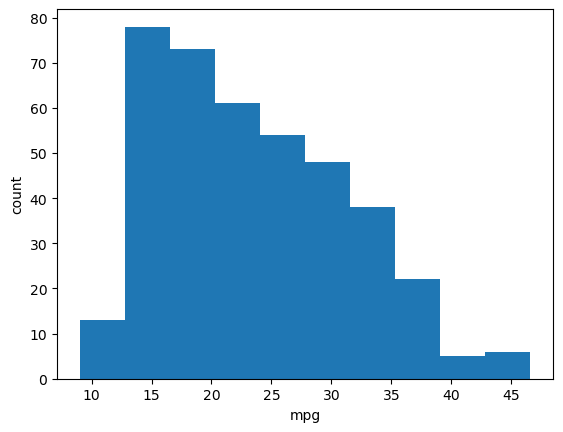

In [15]:
mpg = data['mpg'] # extract the mpg column
plt.hist(mpg) # Plot a histogram of mpg
plt.xlabel('mpg')
plt.ylabel('count')
plt.show()

It looks like most cars have `mpg` around $15$, so why don't we define $f$ to be

$$f(\text{mpg of cars other than $i$-th car}) = 15$$

for each $i = 1, 2, \dots, 398$. 

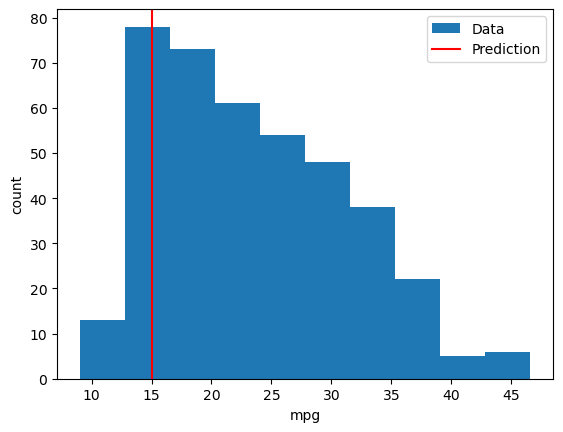

In [16]:
prediction_1 = 15
plt.hist(mpg, label='Data')
plt.axvline(prediction_1, color = 'red', label='Prediction')
plt.xlabel('mpg')
plt.ylabel('count')
plt.legend()
plt.show()

**Question**: Is it a good idea? What will $f$ return for a car with `mpg` 40?

The red vertical line marks our prediction for **every** car in our dataset. Intuitively, you may feel it is too left and see that it is far from many cars in higher `mpg` bins. Perhaps we should shift the red vertical bar to the right. Let's shift the line to the right by $15$.

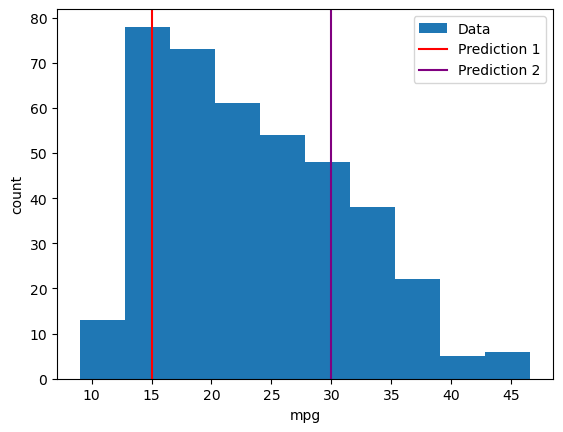

In [17]:
prediction_2 = prediction_1 + 15
plt.hist(mpg, label='Data')
plt.axvline(prediction_1, color = 'red', label='Prediction 1')
plt.axvline(prediction_2, color = 'purple', label='Prediction 2')
plt.xlabel('mpg')
plt.ylabel('count')
plt.legend()
plt.show()

The new prediction looks better as it balances the data more. However, so far the way we evaluate our prediction is fairly subjective. You probably do not want to tell your boss that the second prediction is better than the first because "it looks better". How can we **quantitatively** tell the goodness of a prediction?

<a id='loss'></a>
### Introduction to Least Squared Error 

In the previous examples, all of the provided lines were examples of attempts to predict `mpg`. The question comes to mind: "How do we numerically decide which line is the best line?" Let's define another magic function $L(\cdot)$ that takes in $y_i, \hat{y}_i$ and return a number that is a measurement of how close are $y_i$ and $\hat{y}_i$ to each other. Thus, if $\hat{y}_i$ is a good prediction of $y_i$, then $L(y_i, \hat{y}_i)$ should be smaller. Let's call $L(\cdot)$ "Loss Function".

To measure the goodness of all predictions, we can take the average of the loss function for each car,

$$\text{Average Loss} = \frac{1}{389}\sum_{i=1}^{389}L(y_i, \hat{y}_i) = \frac{1}{389}[L(y_1, \hat{y}_1) + L(y_2, \hat{y}_2) + \cdots + L(y_{389}, \hat{y}_{389})]$$

Now the problem boils down to how to defining $L(\cdot)$. A natural choice is

$$L(y_i, \hat{y}_i) = y_i - \hat{y}_i$$

which makes

$$\text{Average Loss} = \frac{1}{389}\sum_{i=1}^{389}y_i - \hat{y}_i$$

Unfortunately, it turns out that this natural choice is bad. Think about the average loss for two cars with actual and predicted `mpg` $y_1 = 10, y_2 = -10, \hat{y}_1 = \hat{y}_2 = 0$.


So a simple difference is not enough. We need to take out the signs of these differences.

There are two intuitive ways to do this. One is to take the absolute value of the difference. So we have

$$L_{1}(y_i, \hat{y}_i) = |y_i - \hat{y}_i|$$.

The other one is to take the square of the difference. So we have

$$L_{2}(y_i, \hat{y}_i) = (y_i - \hat{y}_i)^2$$.

Both are valid choices and have their own advantages and disadvantages, but we will only talk about the second one, $L_2$, here. If you are interested in their comparison, just search "L1 vs L2 loss" on Google.

**Question**: What is the minimum possible value of $L_2(y_i, \hat{y}_i)$? When will it occur?

With the choice of $L_2$ loss, our average loss becomes

$$\text{Average Loss} = \frac{1}{389}\sum_{i=1}^{389}(y_i - \hat{y}_i)^2$$

### Finding the best line (least squared error)

Now with a new tool for measuring the goodness of our prediction lines, we can evaluate and compare the goodness of these two lines!

In [19]:
average_loss_1 = np.mean((mpg - prediction_1)**2) # compute the L2 average loss of prediction 1
average_loss_2 = np.mean((mpg - prediction_2)**2) # compute the L2 average loss of prediction 2

print("average loss of prediction 1", average_loss_1)
print("average loss of prediction 2", average_loss_2)

average loss of prediction 1 133.43407035175878
average loss of prediction 2 102.99688442211055


Clearly, our second prediction has a much smaller average loss than our first prediction, so we can conclude that the second one is **better** than the first one. But, is the second one the **best** one?

**Question:** How many such vertical lines we can draw on the histogram? i.e., how many choices we have for the magic function $f(\cdot)$?

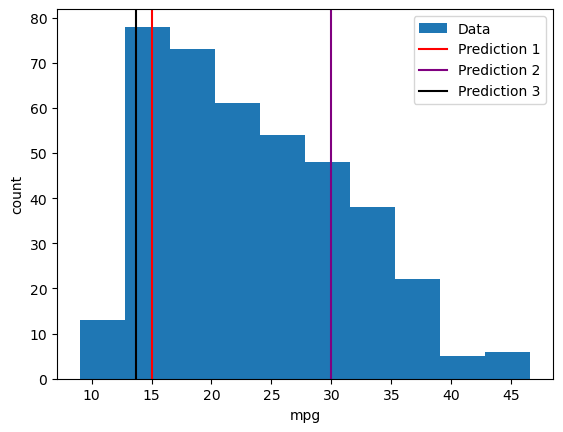

average loss of prediction 1 133.43407035175878
average loss of prediction 2 102.99688442211055
average loss of prediction 3 157.96527577805287


In [20]:
prediction_3 = np.random.uniform(0, 45) # generate a random number that is from uniform[0, 45]
plt.hist(mpg, label='Data')
plt.axvline(prediction_1, color = 'red', label='Prediction 1')
plt.axvline(prediction_2, color = 'purple', label='Prediction 2')
plt.axvline(prediction_3, color = 'black', label='Prediction 3')
plt.xlabel('mpg')
plt.ylabel('count')
plt.legend()
plt.show()

average_loss_3 = np.mean((mpg - prediction_3)**2) # compute the L2 average loss of prediction 3

print("average loss of prediction 1", average_loss_1)
print("average loss of prediction 2", average_loss_2)
print("average loss of prediction 3", average_loss_3)

As we saw above, there are **infinite** choice of $\hat{y}_i$ or $f(\cdot)$. We really want to minimize the **average loss** by controlling each $\hat{y}_i$, which is fully controlled by the magic function $f(\cdot)$.

The minimization of this average loss is called "**Least Squared Error/Loss**".

To analytically implement this minimization process, we need more mathematical formulation. Convincing yourself that

$$\hat{y}_i = f(\text{all the information of cars other than $i$-th car}) = c$$

for $i=1,\dots, 398$ and for some constant $c$ that is a number.

So we trying to find a constant $c$ that makes

$$\text{Average Loss} = \frac{1}{389}\sum_{i=1}^{389}(y_i - \hat{y}_i)^2 = \frac{1}{389}\sum_{i=1}^{389}(y_i - c)^2$$

as small as possible. Formulate this into a mathematical problem, we have

$$\min_{c \in \mathbb{R}} \frac{1}{389}\sum_{i=1}^{389}(y_i - c)^2$$

Now the problem is how to solve this minimization problem.

#### Method: algebraic trick

Start with 

$$\min_{c \in \mathbb{R}} \frac{1}{389}\sum_{i=1}^{389}(y_i - c)^2 = \min_{c \in \mathbb{R}} \frac{1}{389}\sum_{i=1}^{389}(y_i - \bar{y} + \bar{y} - c)^2$$

From the method above, we can get the **best** c, $\hat{c}$, has the form

$$ \hat{c} = \frac{1}{389}\sum_{i=1}^{389}y_i = \bar{y}$$

which is the average of $y_i$.

Let's try to visualize this **best** prediction line.

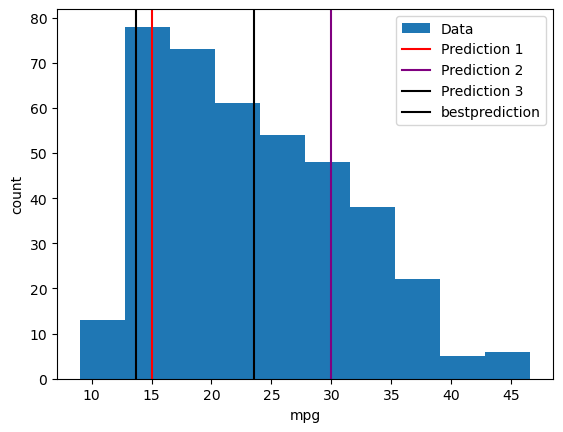

average loss of prediction 1 133.43407035175878
average loss of prediction 2 102.99688442211055
average loss of prediction 3 157.96527577805287
average loss of best prediction 60.93611928991693


In [21]:
best_prediction = np.mean(mpg) # calculute the average of mpg
plt.hist(mpg, label='Data')
plt.axvline(prediction_1, color = 'red', label='Prediction 1')
plt.axvline(prediction_2, color = 'purple', label='Prediction 2')
plt.axvline(prediction_3, color = 'black', label='Prediction 3')
plt.axvline(best_prediction, color = 'black', label='bestprediction')
plt.xlabel('mpg')
plt.ylabel('count')
plt.legend()
plt.show()

average_loss_best_prediction = np.mean((mpg - best_prediction)**2) # compute the L2 average loss of best_prediction

print("average loss of prediction 1", average_loss_1)
print("average loss of prediction 2", average_loss_2)
print("average loss of prediction 3", average_loss_3)
print("average loss of best prediction", average_loss_best_prediction)

We can see that this best prediction kind of achieves the **best** balance among the data.

Since our magic function $f$ is a *constant* function (i.e. it always return the same constant for whatever input), we can call it **constant regression**.

<a id='simple'></a>
## Simple Linear Regression

So far we have only used `mpg` itself to predcit `mpg`, and we haven't used any other information in the dataset. We probably want to use other information because they might be somehow related to `mpg`, so using them is helpful for predicting `mpg`. 

Let's try to use `acceleration` to help predict `mpg`. Since we have a two dimensional data, we can use the scatter plot to visualize them.

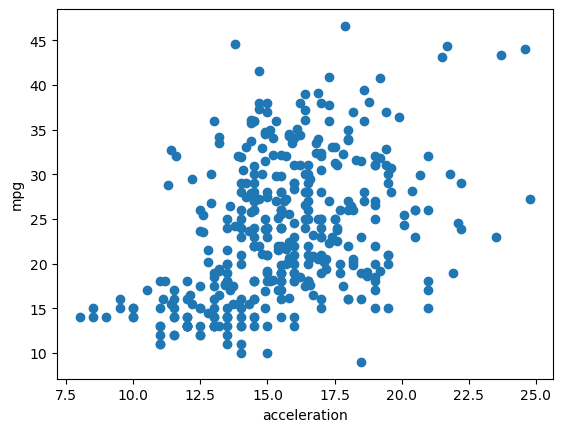

In [22]:
mpg = data['mpg'] # extract the mpg
acceleration = data['acceleration'] # extract the acceleration
plt.scatter(x=acceleration, y=mpg)
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.show()

It looks like there is a **general** relationship that when `acceleration` increases, `mpg` also increases. Let's try to put a straight line on the scatter plot to express this relationship. We know that a line has a mathematical form as

$$ y = a + b\cdot x$$

If we want our magic function $f$ to do the same thing, then we have the following mathematical formulation

$$\hat{y}_i = f(\text{acceleration of $i$-th car}) = a + b \cdot x_i$$

Let's use $a = 5$ and $b = 2$ just for the first try.

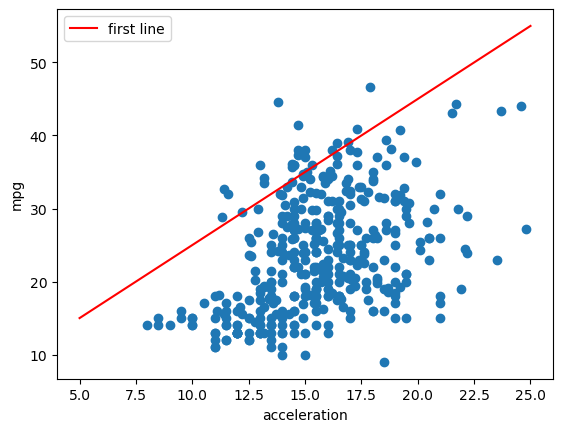

In [26]:
a_1 = 5
b_1 = 2
x = np.linspace(5,25,100)
y_1 = a_1 + b_1 * x
plt.scatter(x=acceleration, y=mpg)
plt.plot(x, y_1, color='red', label='first line')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend()
plt.show()

Looks like a little bit too high, and we want to shift the line a little bit downwards. How can we do this?

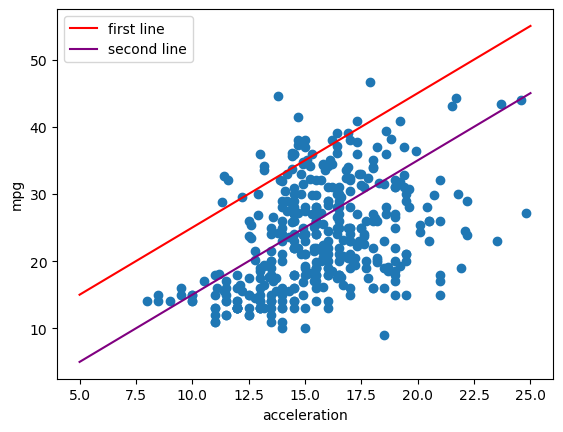

In [27]:
a_2 = a_1 - 10 
b_2 = b_1
y_2 = a_2 + b_2 * x
plt.scatter(x=acceleration, y=mpg)
plt.plot(x, y_1, color='red', label='first line')
plt.plot(x, y_2, color='purple', label='second line')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend()
plt.show()

The new line looks better. Again, just like what we have dones for constant regression, we want to quantitatively compare these two lines by computing and comparing their **average L2 loss**.

In [28]:
mpg_pred_1 = a_1 + b_1 * acceleration # predicted mpg using line 1 on acceleration
mpg_pred_2 = a_2 + b_2 * acceleration # predicted mpg using line 2 on acceleration

average_loss_line_1 = np.mean((mpg - mpg_pred_1)**2)
average_loss_line_2 = np.mean((mpg - mpg_pred_2)**2)

print("average loss of line 1", average_loss_line_1)
print("average loss of line 2", average_loss_line_2)

average loss of line 1 214.43939698492463
average loss of line 2 62.007236180904535


However, the similar question arises here: Since we have **infinite** choices of $a$ and $b$, how can we find the **best** choice of $a$ and $b$? In other words, we want to solve the following problem

$$\min_{a, b \in \mathbb{R}} \frac{1}{389}\sum_{i=1}^{389}(y_i - (a + b\cdot x_i))^2$$

And this minimization problem is what we called **Simple Linear Regression**.

The algebraic trick we used before to solve the constant regression cannot be used here, so we have to use a more advanced tool, calculus to solve this problem.

We omit the technical details here because you need the knowledge of MATH 53, but if you are interested in them, you can click [this link](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)! For now, we'll just tell you that best $a$ and $b$, denoted by $\hat{a}$ and $\hat{b}$, can be solved as:

$$
\begin{aligned}
\hat{a}&=\bar {y}-\hat{b}\cdot{\bar{x}},\\
\hat{b}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}
$$

where $\bar{x}$ and $\bar{y}$ are the average of $x_i$ and $y_i$ respectively.

Now let's try to compute $\hat{a}, \hat{b}$

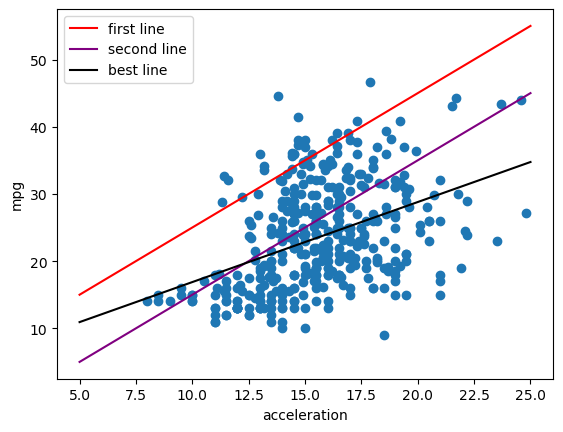

average loss of line 1 214.43939698492463
average loss of line 2 62.007236180904535
average loss of best line 50.172194407701355


In [29]:
x_bar = np.mean(acceleration)
y_bar = np.mean(mpg)

b_hat_num = np.sum((acceleration - x_bar) * (mpg - y_bar)) # numerator of b_hat
b_hat_den = np.sum((acceleration - x_bar) ** 2) # denominator of b_hat


b_hat = b_hat_num / b_hat_den
a_hat = y_bar - b_hat * x_bar
y_best = a_hat + b_hat * x
plt.scatter(x=acceleration, y=mpg)
plt.plot(x, y_1, color='red', label='first line')
plt.plot(x, y_2, color='purple', label='second line')
plt.plot(x, y_best, color='black', label='best line')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend()
plt.show()

mpg_pred_best = a_hat + b_hat * acceleration
average_loss_best_line = np.mean((mpg - mpg_pred_best)**2)

print("average loss of line 1", average_loss_line_1)
print("average loss of line 2", average_loss_line_2)
print("average loss of best line", average_loss_best_line)

Indeed, $\hat{a}, \hat{b}$ seems to match the data **best** among these three lines. It also achieves the lowest average loss.

The manual calculation seems a little bit complicated here. We can use `sklearn`'s `linear_model` module makes it really easy to make linear models! There's a lot of different types of linear models implemented in the `linear_model` module, which you can take a look at [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) if you're interested, but for today we'll be using `LinearRegression`, which we've imported for you in the cell below. Try reading the documentation to figure out what the `fit()` function expects as input to correctly fit our model to the data!

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Initialize our linear regression model
linear_model = LinearRegression()

X = data[['acceleration']]
y = data['mpg']

# Fit the model to the data
linear_model.fit(X, y)

LinearRegression()

Once you've got it working you'll notice that it seems like nothing happened. However, behind the scenes, our `linear_model` variable has now been fit to the data we passed into the `fit()` function! We can see what the `slope` and `intercept` are by looking into the `coef_` and `intercept_` attributes of our `linear_model`.

In [32]:
linear_model.coef_, linear_model.intercept_

(array([1.19120453]), 4.969793004253901)

**Question**: Does the output here match the manual computation before?

You might notice that, while the `intercept_` is a single scalar value, `coef_` returns an array. This is because you can choose to fit your model to multiple explanatory variables (hence the list form of `feature_cols`). When you define multiple explanatory variables, the `coef_` will contain a separate coefficient for each explanatory variable you chose! You'll be able to explore that in a bit, but for now let's take a look at what our linear model looks like relative to our original data.

We've provided the skeleton for a helper function called `overlay_simple_linear_model`. Try to fill out the function so that it plots a scatterplot with the linear model overlaid on top.

*Hint:* If you press `tab` after a `[object].` or `[package].`, Jupyter will show you a list of valid functions defined for that object type or package.

In [34]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. data
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model: a fitted linear model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    
    x = np.arange(max(data[x_name])).reshape(-1, 1) # a 2D array of integers between 0 and the maximum value of the x_name column
    y = linear_model.predict(x) # use linear_model to predict
    
    data.plot.scatter(x_name, y_name) # scatter plot of x_name vs. y_name
    
    plt.plot(x, y) # plot the prediction
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


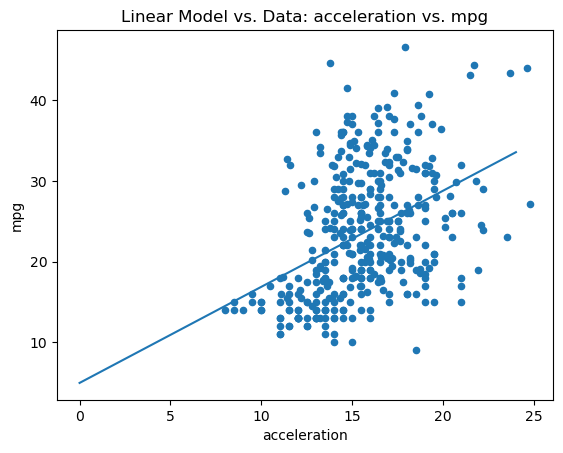

In [35]:
# If you wrote the function above correctly, the output should look like this
overlay_simple_linear_model(data, 'acceleration', "mpg", linear_model)

<a id='interpreting_model'></a>
### Interpreting the Model

You're probably thinking "COOL! This looks like a pretty good representation of the data! But what do these coefficients even mean?" That is a great question! As you might have guessed, the `intercept` term is where our line intersects with the y-axis, or when our predictor variable has a value of 0. In relation to our model, it's our prediction for `mpg` given a predictor variable value of 0. The `slope` term is a little more complicated. Yes, it is the slope of the line, but how do we interpret it in the relationship between `mpg` and our explanatory variable?

**Question:** What will happen to $\hat{y}_i$ if we increases $x_i$ by $1$? How do we express this change in plain English when $y_i$ and $x_i$ represent `mpg` and `acceleration`?

<a id='assessment'></a>
### Assessing the Model

#### Residual

Let's first define a concept called **residual**. For a sample (which is a car in our example), define its residual, $e_i$, as

$$e_i = y_i - \hat{y}_i$$

which is exactly the same as the simple difference we found before.

<a id='r_squared'></a>
#### Coefficient of Determination ($R^2$)
Another question you might have is, how do we know how good our model is?
If you've taken AP Stats or Data 8, you might have heard that the **correlation coefficient**, $R$, 
tells us how strong of an association two variables have. Values close to -1 or 1 have a strong association.
We are going to talk about another way of measuring how well your model fits the data is the $R^2$ coefficient,
or the **coefficient of determination**. Basically, what the $R^2$ represents is how much our data can vary but
still be predicted accurately by the explanatory variable. 
$$R^2 = 1- \frac{\sum_{i}e_i^2}{\sum_{i}(y_i-\bar{y})^2}$$
where $\sum_{i}(y_i-\bar{y})^2$ is called **total sum of squares** and $\sum_{i}e_i^2$ is called **residual sum of squares** as we've already known. Intuitively, $R^2$ measures how much better our fitted model is doing compared to the most basic model where we
predict $\hat{y}_i = \bar{y}$ for every data point.

<img src='https://i.imgur.com/URDr1oW.png' />

We can obtain our model's $R^2$ value by using our `linear_model`'s `score()` function, like so:

In [36]:
linear_model.score(X, y) # you'll only need to use variables that we've already defined

0.176642769635589

In practice, $R^2$ is almost always between 0 and 1, although it is possible for $R^2$ to take on a negative value when your model is worse than the baseline model $\hat{y}_i = \bar{y}$.

**We want the $R^2$ of our simple linear regression to be as HIGH as possible**.

**Excersise**: Find another column in the data such that its simple linear regression has a higher $R^2$ than `acceleration` in the following cell.

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


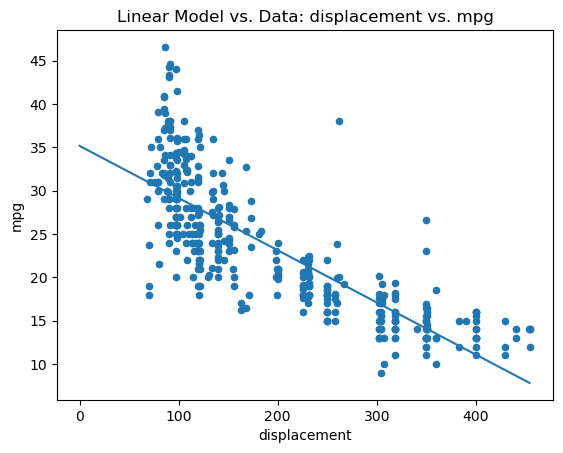

0.6467421834257859

In [39]:
# Initialize our linear regression model
linear_model = LinearRegression()

X = data[['displacement']]
y = data['mpg']

# Fit the model to the data
linear_model.fit(X, y)

overlay_simple_linear_model(data, 'displacement', "mpg", linear_model)

# Compute R^2
linear_model.score(X, y)

<a id='residual_plots'></a>
#### Residual Plots
Another way of analyzing your model is through *residual plots*. A **residual plot** is kind of what you'd think – it plots your residuals against the corresponding $x$ values. If you see interesting patterns in your residual plot, it's indicative of some *bias* in your model – your error isn't due to randomness in the data but because of an underlying problem in the way you've defined the relationship between your variables. 

Fill in the blanks in the `plot_simple_residuals()` function, so we can take a look at the residual plot.



<img src='https://www.qualtrics.com/support/wp-content/uploads/2017/07/Screen-Shot-2017-07-19-at-9.46.11-AM.png' width='800px' />


In [46]:
def plot_simple_residuals(data, x_name, y_name, linear_model):
    """
    This function plots a residual plot based off of a simple linear model 
    on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. data
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs residual plot resulting from linear model overlaid on scatterplot
    """
    X = data[[x_name]]
    y = data[y_name]
    
    pred_y = linear_model.predict(X)
    
    residuals = y - pred_y
    
    plt.scatter(X, residuals) # plot residuals (Hint: use plt.scatter())
    plt.axhline(y=0, color='r', linestyle='-') # plots line at y = 0
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.xlabel(x_name)
    plt.ylabel("Residuals")
    plt.show()

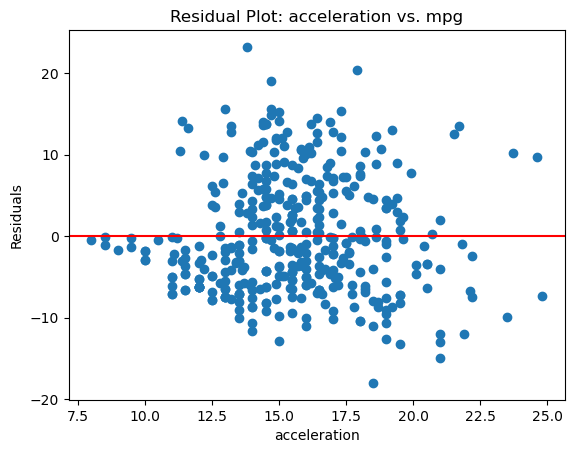

In [47]:
# Initialize our linear regression model
linear_model = LinearRegression()

X = data[['acceleration']]
y = data['mpg']

# Fit the model to the data
linear_model.fit(X, y)

# Compute R^2
linear_model.score(X, y)

plot_simple_residuals(data, 'acceleration', 'mpg', linear_model)

Did you observe any special pattern from the residual plot? 

Note: [Here](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)'s some more information about how to interpret different patterns in residual plots and how you can change your model to fix these errors.

To see more about how residual plots can help us evaluate our predictions, let us try to connect the constant regression to the simple linear regression

## Connecting constant regression and simple linear regression

Recall the mathematical formulation of these two regression methods.

Constant regression:

$$\hat{y}_i = c$$

Simple linear regression:

$$\hat{y}_i = a + b\cdot x_i$$

for some numbers $a, b, c$.

Do you observe any relationship between them? *Hint: what will happen if we set $a=0$ and $x_i=1$?*

Let's implement this with `sklearn`.

In [48]:
# Initialize our linear regression model
linear_model = LinearRegression(fit_intercept = False)

X = np.ones((398, 1))
y = data['mpg']

# Fit the model to the data
linear_model.fit(X, y)

# Compute R^2
linear_model.score(X, y)

1.1102230246251565e-16

You can see the $R^2$ is almost 0! It means our constant prediction is really bad!!!

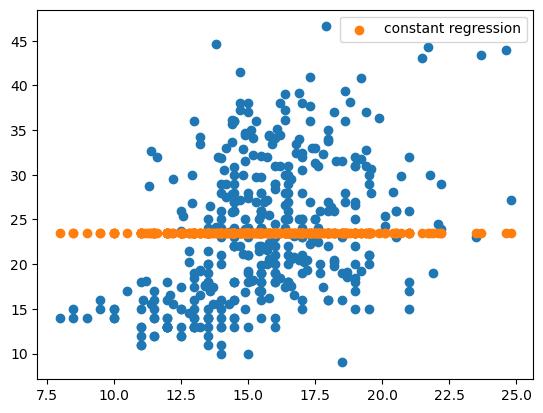

In [51]:
plt.scatter(acceleration, mpg)
mpg_pred_constant_reg = linear_model.predict(X)
plt.scatter(acceleration, mpg_pred_constant_reg , label = 'constant regression')
plt.legend()
plt.show()

All the prediction seems to be very wrong. Let's check the residual plot

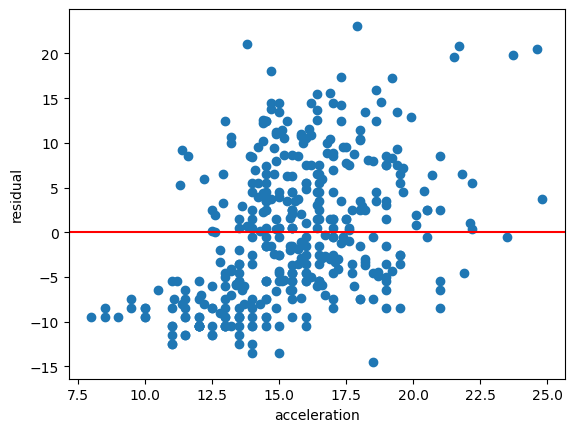

In [52]:
residuals = mpg - mpg_pred_constant_reg 
plt.scatter(acceleration, residuals)
plt.axhline(0, color = 'red')
plt.xlabel('acceleration')
plt.ylabel('residual')
plt.show()

You can see that the residual plot looks the same as the scatter plot of `mpg` vs `acceleration`, which implies a strong pattern/relationship.

**Question**: Check the fitted coefficient of our model and the average of `mpg`. Why are some numbers the same?

In [53]:
linear_model.coef_, linear_model.intercept_, np.mean(mpg)

(array([23.51457286]), 0.0, 23.514572864321607)

<a id='assumptions'></a>
## Model Assumptions

let's take a look at the keys assumptions we have made in simple linear regression.
* **Linearity**: The relationship between the $x_i$ and $y_i$ is linear.
* **Homoscedasticity**: The residuals should not have a clear relationship with a variable used for prediction
<img src='Hetero.png' width=400 />


There are some other assumptions about linear regression such as **Independence** and **Normality** which require a more advanced mathematical formulation of linear regression. We skip them here but if you are interested in them, you can take a look at [this](https://www.statology.org/linear-regression-assumptions/). 

## Conclusion

To use simple linear regression in practice, the procedure is like

1) Pick a set of variables you want to use to help predict
2) Fit a simple linear regression model for each variable
3) Compute their $R^2$
4) Plot their residual plots and prediction overlay plots
5) Compare step 3 and 4 and pick the best model. If none of these models is satisfying enough to you, choose more variables and go back to step 2.

### Adding Explanatory Variables
Now that you're a master of simple linear regression, you're probably thinking "WHY CAN'T I USE MORE EXPLANATORY VARIABLES? What if I think `mpg` could be better predicted if I knew *two* of the variables? Wouldn't that make my model better?" Why, Ms/Mr. Genius Statistician, you *can* use more explanatory variables! That leads us to *multiple linear regression*, which you will see next week.

### Matrix Form of Simple Linear Regression
Now let's put everything together and put everything in the matrix form. $$\mathbf{\hat{y}} = \begin{bmatrix} \hat{y}_1 \\ \hat{y}_2\\ \vdots \\ \hat{y}_n\end{bmatrix}, \mathbf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2\\ \vdots \\ 1 & x_n\end{bmatrix}, \mathbf{\hat{\theta}} = \begin{bmatrix} \hat{\theta}_0 \\ \hat{\theta}_1\end{bmatrix}$$ $$\mathbf{\hat{y}} = \mathbf{X}\mathbf{\hat{\theta}}$$

## Resources/References
- [Matplotlib Tutorial - Nicolas P. Rougier](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d2595a8-48cb-4553-85ca-2d6076eb07b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>